# Environment setup

In [1]:
# !pip install scikit-learn==1.2.2

In [2]:
# !pip install data_describe
# !pip install missingno

In [3]:
%matplotlib inline
import data_describe as dd
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import datetime as dt
import sklearn
import pickle
import copy


from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn import metrics 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor




from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

# Import dataset

In [4]:
data=pd.read_csv('C:/Users/herry/Desktop/Data eng/finalproject/incident.csv')

In [5]:
#View header data
data.head()

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Ground_Casualties,Collision_Casualties
0,3-Jan-22,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,Fatalities: 0 / Occupants: 3,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",NaN,NaN
1,4-Jan-22,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roat谩n-Juan ...,Substantial,Tuesday 4 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roat谩n-Juan Manuel G谩lvez International Airpor...,NaN,NaN
2,5-Jan-22,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",NaN,NaN
3,8-Jan-22,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,...,Fatalities: 0 / Occupants: 8,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",NaN,NaN
4,12-Jan-22,Beechcraft 200 Super King Air,NaN,T,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,NaN,NaN


# EDA

## Key characteristics

### data types 

In [6]:
#View datatypes
data.dtypes

Incident_Date           object
Aircaft_Model           object
Aircaft_Registration    object
Aircaft_Operator        object
Aircaft_Nature          object
Incident_Category       object
Incident_Cause(es)      object
Incident_Location       object
Aircaft_Damage_Type     object
Date                    object
Time                    object
Arit                    object
Aircaft_Engines         object
Onboard_Crew            object
Onboard_Passengers      object
Onboard_Total           object
Fatalities               int64
Aircaft_First_Flight    object
Aircraft_Phase          object
Departure_Airport       object
Destination_Airport     object
Ground_Casualties       object
Collision_Casualties    object
dtype: object

### total rows of data

In [7]:
num_rows = len(data)
num_rows

23519

<Axes: >

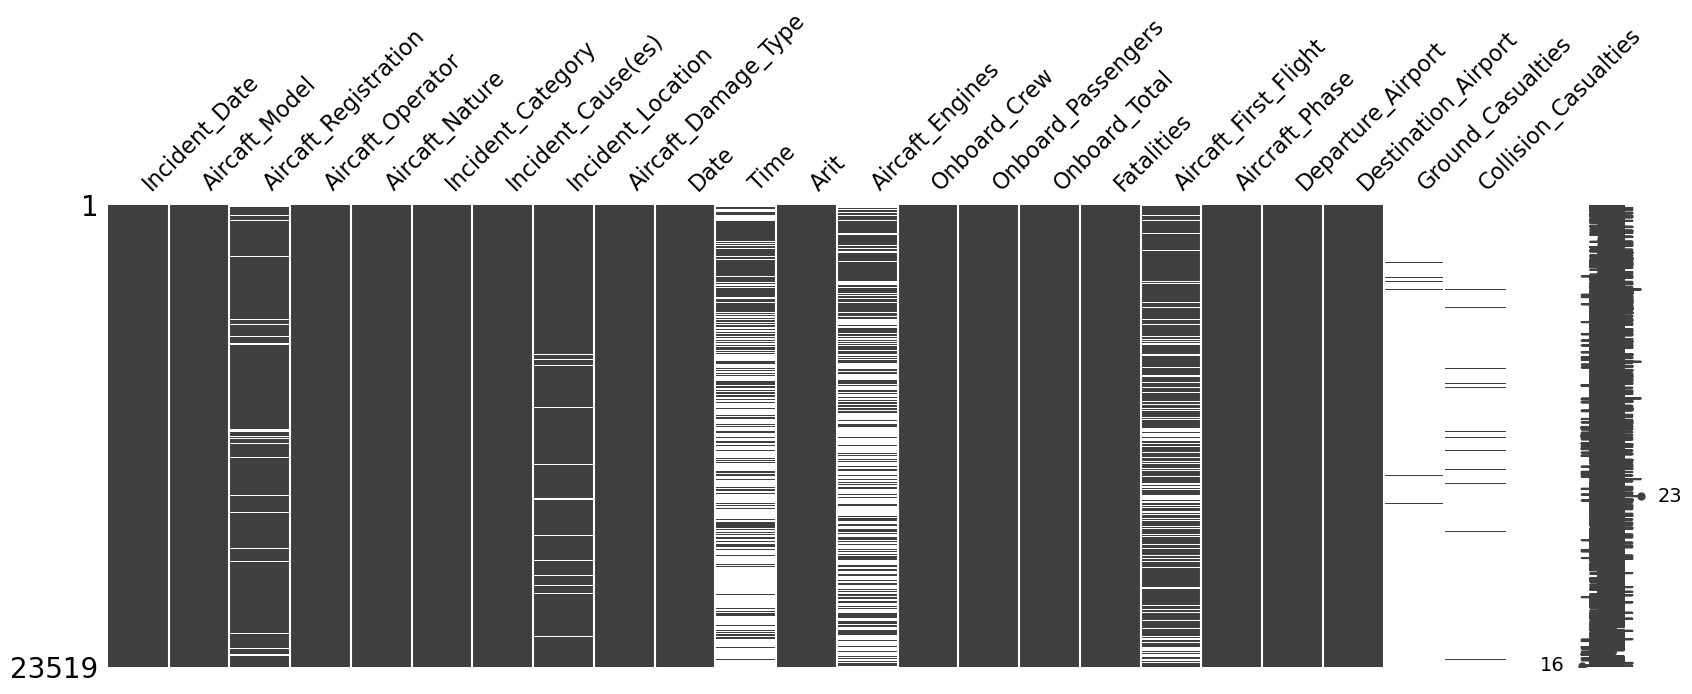

In [8]:
msno.matrix(data,figsize = (20,6))

In [9]:
total_rows = data.shape[0]

# Calculate the percentage of null values in each column
null_percentage = (data.isnull().sum() / total_rows) * 100
null_percentage

Incident_Date            0.000000
Aircaft_Model            0.000000
Aircaft_Registration     6.637187
Aircaft_Operator         0.000000
Aircaft_Nature           0.000000
Incident_Category        0.000000
Incident_Cause(es)       0.000000
Incident_Location        3.962754
Aircaft_Damage_Type      0.000000
Date                     0.000000
Time                    60.869935
Arit                     0.000000
Aircaft_Engines         54.776989
Onboard_Crew             0.000000
Onboard_Passengers       0.000000
Onboard_Total            0.000000
Fatalities               0.000000
Aircaft_First_Flight    23.334325
Aircraft_Phase           0.000000
Departure_Airport        0.000000
Destination_Airport      0.000000
Ground_Casualties       98.524597
Collision_Casualties    98.758451
dtype: float64

### data cleaning

In [10]:
columns_to_check = data.columns[data.columns.get_loc('Incident_Date'):data.columns.get_loc('Destination_Airport')+1]
columns_to_check

Index(['Incident_Date', 'Aircaft_Model', 'Aircaft_Registration',
       'Aircaft_Operator', 'Aircaft_Nature', 'Incident_Category',
       'Incident_Cause(es)', 'Incident_Location', 'Aircaft_Damage_Type',
       'Date', 'Time', 'Arit', 'Aircaft_Engines', 'Onboard_Crew',
       'Onboard_Passengers', 'Onboard_Total', 'Fatalities',
       'Aircaft_First_Flight', 'Aircraft_Phase', 'Departure_Airport',
       'Destination_Airport'],
      dtype='object')

## number of rows of problem data contains ?

In [11]:
## number of rows of problem data 
contains_question_mark_or_nan = data[columns_to_check].applymap(lambda x: x == '?').any(axis=1)
count_question_mark_or_nan = contains_question_mark_or_nan.sum()
count_question_mark_or_nan

9824

## number of rows of problem data that have na

In [12]:
contains_question_mark_or_nan = data[columns_to_check].applymap(lambda x: pd.isna(x)).any(axis=1)
count_question_mark_or_nan = contains_question_mark_or_nan.sum()
count_question_mark_or_nan

17747

## number of rows of problem data in date

In [13]:
missing_date_data = data[data['Incident_Date'].str.contains('\?')]

In [14]:
num_rows = len(missing_date_data )
num_rows

507

In [15]:
data

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Ground_Casualties,Collision_Casualties
0,3-Jan-22,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,Fatalities: 0 / Occupants: 3,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",NaN,NaN
1,4-Jan-22,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roat谩n-Juan ...,Substantial,Tuesday 4 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roat谩n-Juan Manuel G谩lvez International Airpor...,NaN,NaN
2,5-Jan-22,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",NaN,NaN
3,8-Jan-22,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,...,Fatalities: 0 / Occupants: 8,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",NaN,NaN
4,12-Jan-22,Beechcraft 200 Super King Air,NaN,T,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23514,25-Feb-20,Handley Page O/400,G-EAMC,Handley Page Transport,Unknown,Accident | hull-loss,"Result - Emergency, forced landing - Outside a...",near El Shereik,Damaged beyond repair,Wednesday 25 February 1920,...,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 4,0,NaN,Unknown (UNK),"Aswan Airport (ASW/HESN) , Egypt","Khartoum-Civil Airport (KRT/HSSS) , Sudan",NaN,NaN
23515,30-Jun-20,Handley Page O/400,G-EAKE,Handley Page Transport,Demonstration,Accident | hull-loss,"Result - Emergency, forced landing - Outside a...",脰stan氓,Damaged beyond repair,Wednesday 30 June 1920,...,Fatalities: 0 / Occupants: 2,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 2,0,1919,En route (ENR),"Stockholm (unknown airport) , Sweden","Kjeller Air Base (ENKJ) , Norway",NaN,NaN
23516,14-Dec-20,Handley Page O/400,G-EAMA,Handley Page Transport,International Scheduled Passenger,Accident | hull-loss,Result - CFIT - Level ground,Golders Green,Damaged beyond repair,Tuesday 14 December 1920,...,Fatalities: 2 / Occupants: 2,Fatalities: 2 / Occupants: 6,Fatalities: 4 / Occupants: 8,4,NaN,Initial climb (ICL),"London-Cricklewood Aerodrome , United Kingdom","Paris-Le Bourget Airport (LBG/LFPB) , France",NaN,NaN
23517,2-Aug-19,Caproni Ca.48,NaN,Caproni,Passenger,Accident | hull-loss,Info-Unavailable,Verona,Destroyed,Saturday 2 August 1919,...,Fatalities: 2 / Occupants: 2,Fatalities: 12 / Occupants: 12,Fatal

### drop datas with unknow date

In [16]:
data = data.drop(missing_date_data.index)

In [17]:
import pandas as pd
from datetime import datetime

In [18]:
#Append new column with converted date types
def convert_date(date_string):
    try:
        # Try parsing as '%d-%b-%y' format
        return datetime.strptime(date_string, '%d-%b-%y')
    except ValueError:
        try:
            # Try parsing as 'YYYY-MM-DD' format using pd.to_datetime with format parameter
            parsed_date = pd.to_datetime(date_string, format='%Y-%m-%d')
            current_year = pd.Timestamp.today().year
            threshold_year = 50  # Set the threshold year for disambiguation
            # If the parsed year is greater than the threshold year, subtract 100 years
            if parsed_date.year > current_year % 100:
                return parsed_date - pd.DateOffset(years=100)
            else:
                return parsed_date
        except ValueError:
            return None  # Return None for invalid dates

# Convert the 'Incident_Date' column, handling different date formats by setting them to datetime or None
data['Incident_Date'] = data['Incident_Date'].apply(lambda x: convert_date(x))


In [21]:
data

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Ground_Casualties,Collision_Casualties
0,2022-01-03,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,Fatalities: 0 / Occupants: 3,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",NaN,NaN
1,2022-01-04,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roat谩n-Juan ...,Substantial,Tuesday 4 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roat谩n-Juan Manuel G谩lvez International Airpor...,NaN,NaN
2,2022-01-05,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",NaN,NaN
3,2022-01-08,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,...,Fatalities: 0 / Occupants: 8,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",NaN,NaN
4,2022-01-12,Beechcraft 200 Super King Air,NaN,T,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23514,2020-02-25,Handley Page O/400,G-EAMC,Handley Page Transport,Unknown,Accident | hull-loss,"Result - Emergency, forced landing - Outside a...",near El Shereik,Damaged beyond repair,Wednesday 25 February 1920,...,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 4,0,NaN,Unknown (UNK),"Aswan Airport (ASW/HESN) , Egypt","Khartoum-Civil Airport (KRT/HSSS) , Sudan",NaN,NaN
23515,2020-06-30,Handley Page O/400,G-EAKE,Handley Page Transport,Demonstration,Accident | hull-loss,"Result - Emergency, forced landing - Outside a...",脰stan氓,Damaged beyond repair,Wednesday 30 June 1920,...,Fatalities: 0 / Occupants: 2,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 2,0,1919,En route (ENR),"Stockholm (unknown airport) , Sweden","Kjeller Air Base (ENKJ) , Norway",NaN,NaN
23516,2020-12-14,Handley Page O/400,G-EAMA,Handley Page Transport,International Scheduled Passenger,Accident | hull-loss,Result - CFIT - Level ground,Golders Green,Damaged beyond repair,Tuesday 14 December 1920,...,Fatalities: 2 / Occupants: 2,Fatalities: 2 / Occupants: 6,Fatalities: 4 / Occupants: 8,4,NaN,Initial climb (ICL),"London-Cricklewood Aerodrome , United Kingdom","Paris-Le Bourget Airport (LBG/LFPB) , France",NaN,NaN
23517,2019-08-02,Caproni Ca.48,NaN,Caproni,Passenger,Accident | hull-loss,Info-Unavailable,Verona,Destroyed,Saturday 2 August 1919,...,Fatalities: 2 / Occupants: 2,Fatalities: 12 / Occup

## missing no test

<Axes: >

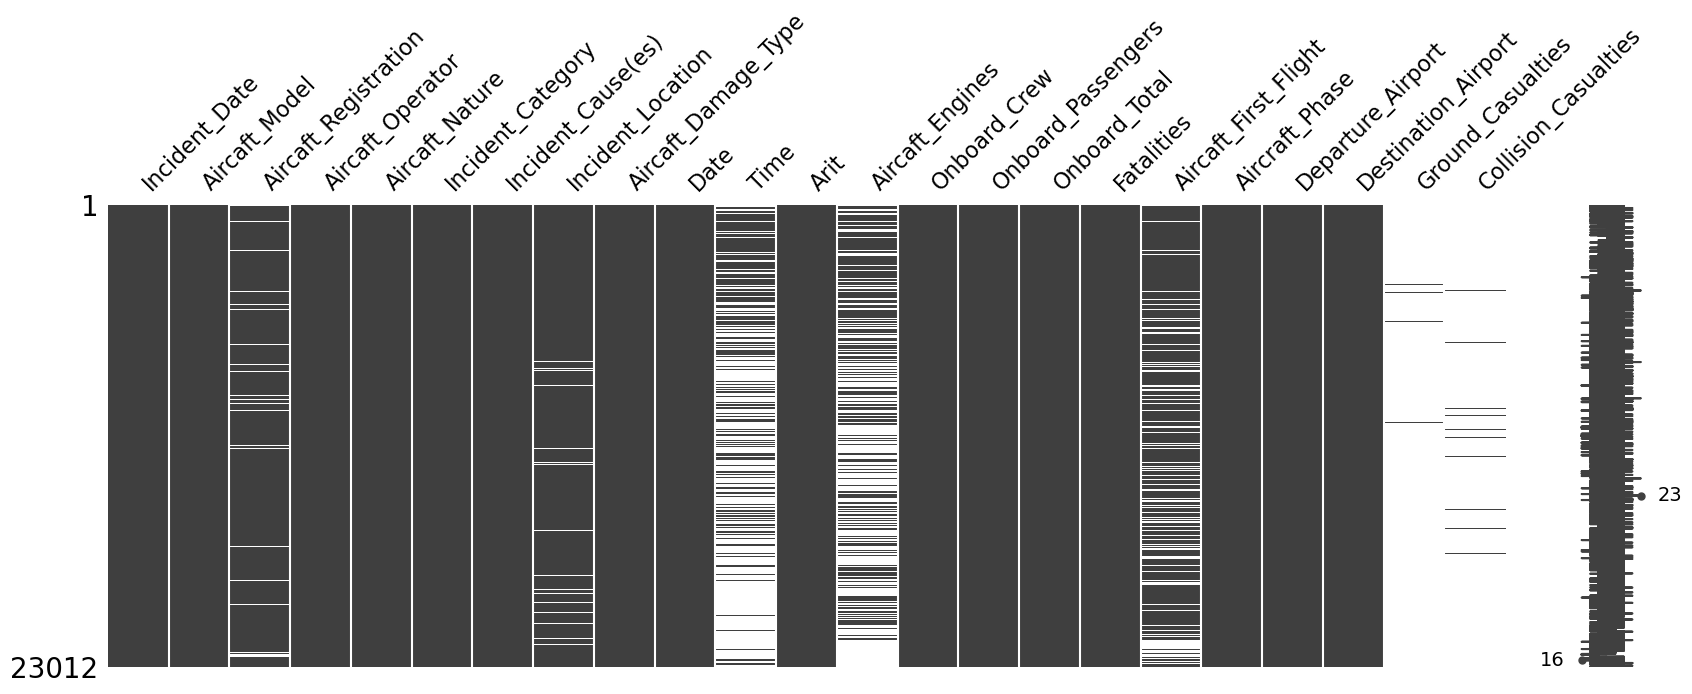

In [22]:
msno.matrix(data,figsize = (20,6))

## null percentage

In [23]:
total_rows = data.shape[0]

# Calculate the percentage of null values in each column
null_percentage = (data.isnull().sum() / total_rows) * 100
null_percentage

Incident_Date            0.008691
Aircaft_Model            0.000000
Aircaft_Registration     6.574831
Aircaft_Operator         0.000000
Aircaft_Nature           0.000000
Incident_Category        0.000000
Incident_Cause(es)       0.000000
Incident_Location        3.298279
Aircaft_Damage_Type      0.000000
Date                     0.000000
Time                    60.007822
Arit                     0.000000
Aircaft_Engines         54.249957
Onboard_Crew             0.000000
Onboard_Passengers       0.000000
Onboard_Total            0.000000
Fatalities               0.000000
Aircaft_First_Flight    23.061881
Aircraft_Phase           0.000000
Departure_Airport        0.000000
Destination_Airport      0.000000
Ground_Casualties       98.496437
Collision_Casualties    98.731097
dtype: float64

<Axes: >

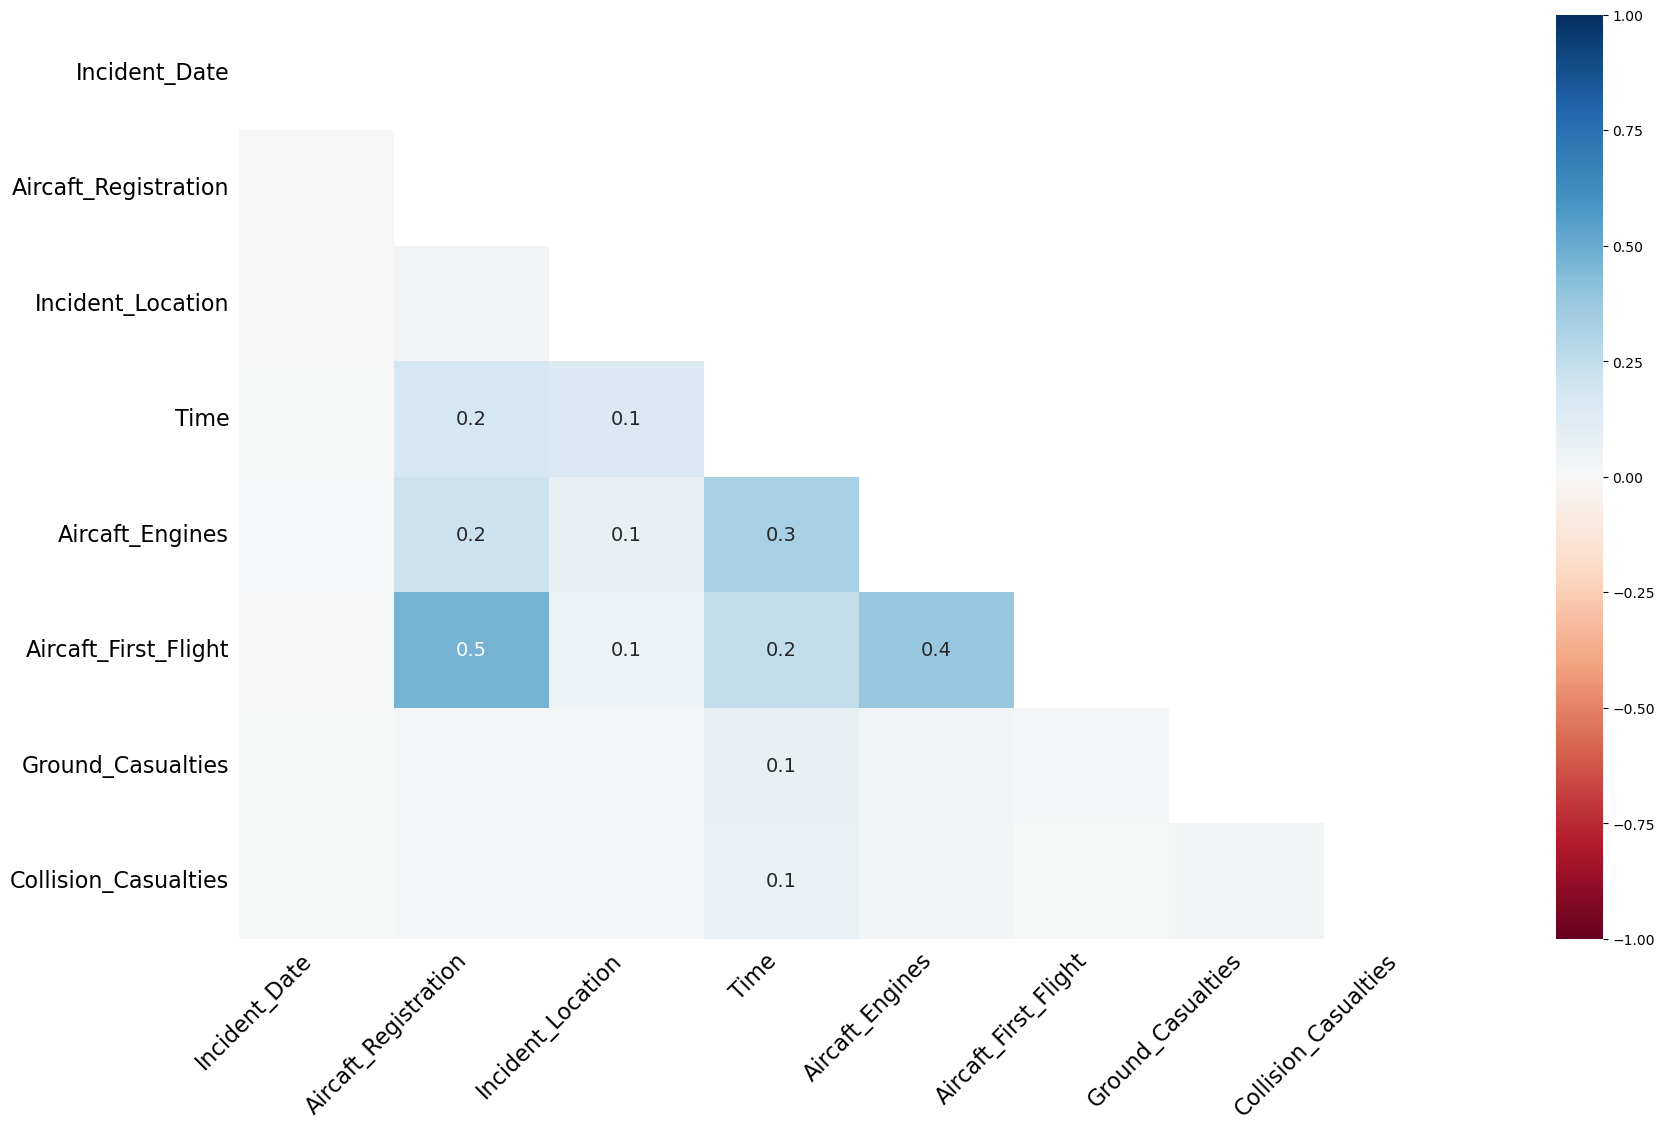

In [24]:
msno.heatmap(data)

(array([2.296e+04, 4.800e+01, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  169.2,  338.4,  507.6,  676.8,  846. , 1015.2, 1184.4,
        1353.6, 1522.8, 1692. ]),
 <BarContainer object of 10 artists>)

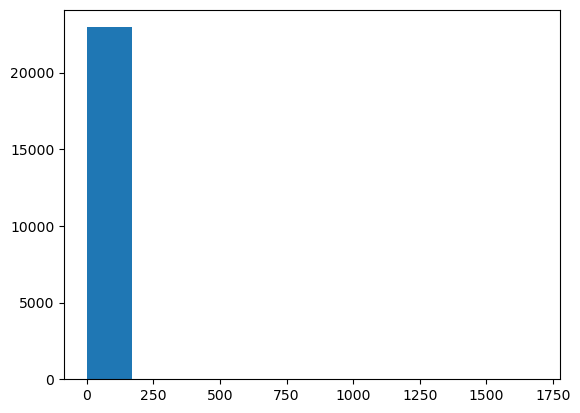

In [26]:
plt.hist(data['Fatalities'])

In [30]:
#count occurrence of each value in 'default' column 
df.Fatalities.value_counts()

0      13791
2       1119
1       1041
3        987
4        882
       ...  
127        1
329        1
200        1
520        1
124        1
Name: Fatalities, Length: 203, dtype: int64

In [31]:
df.Fatalities.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0      59.9%
2       4.9%
1       4.5%
3       4.3%
4       3.8%
       ...  
127     0.0%
329     0.0%
200     0.0%
520     0.0%
124     0.0%
Name: Fatalities, Length: 203, dtype: object